  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 90

[1] 60

50 1.09098 
100 1.082823 
150 1.070271 
200 1.049494 
250 1.02337 
300 0.9924952 
350 0.9493208 
400 0.8965239 
450 0.8532464 
500 0.8190056 
550 0.7904275 
600 0.764934 
650 0.7400992 
700 0.7131178 
750 0.6807201 
800 0.642062 
850 0.6019153 
900 0.5660937 
950 0.5359435 
1000 0.5096606 
1050 0.48593 
1100 0.4637937 
1150 0.4427136 
1200 0.4223783 
1250 0.4026289 
1300 0.3834381 
1350 0.3649044 
1400 0.3471114 
1450 0.330141 
1500 0.3140695 
1550 0.2989607 
1600 0.2848554 
1650 0.2717722 
1700 0.259683 
1750 0.2485507 
1800 0.238327 
1850 0.2289553 
1900 0.2203745 
1950 0.212521 
2000 0.2053328 


            labels.dnn
              1  2  3
  setosa     28  0  0
  versicolor  0 12  0
  virginica   0  0 20

[1] 1

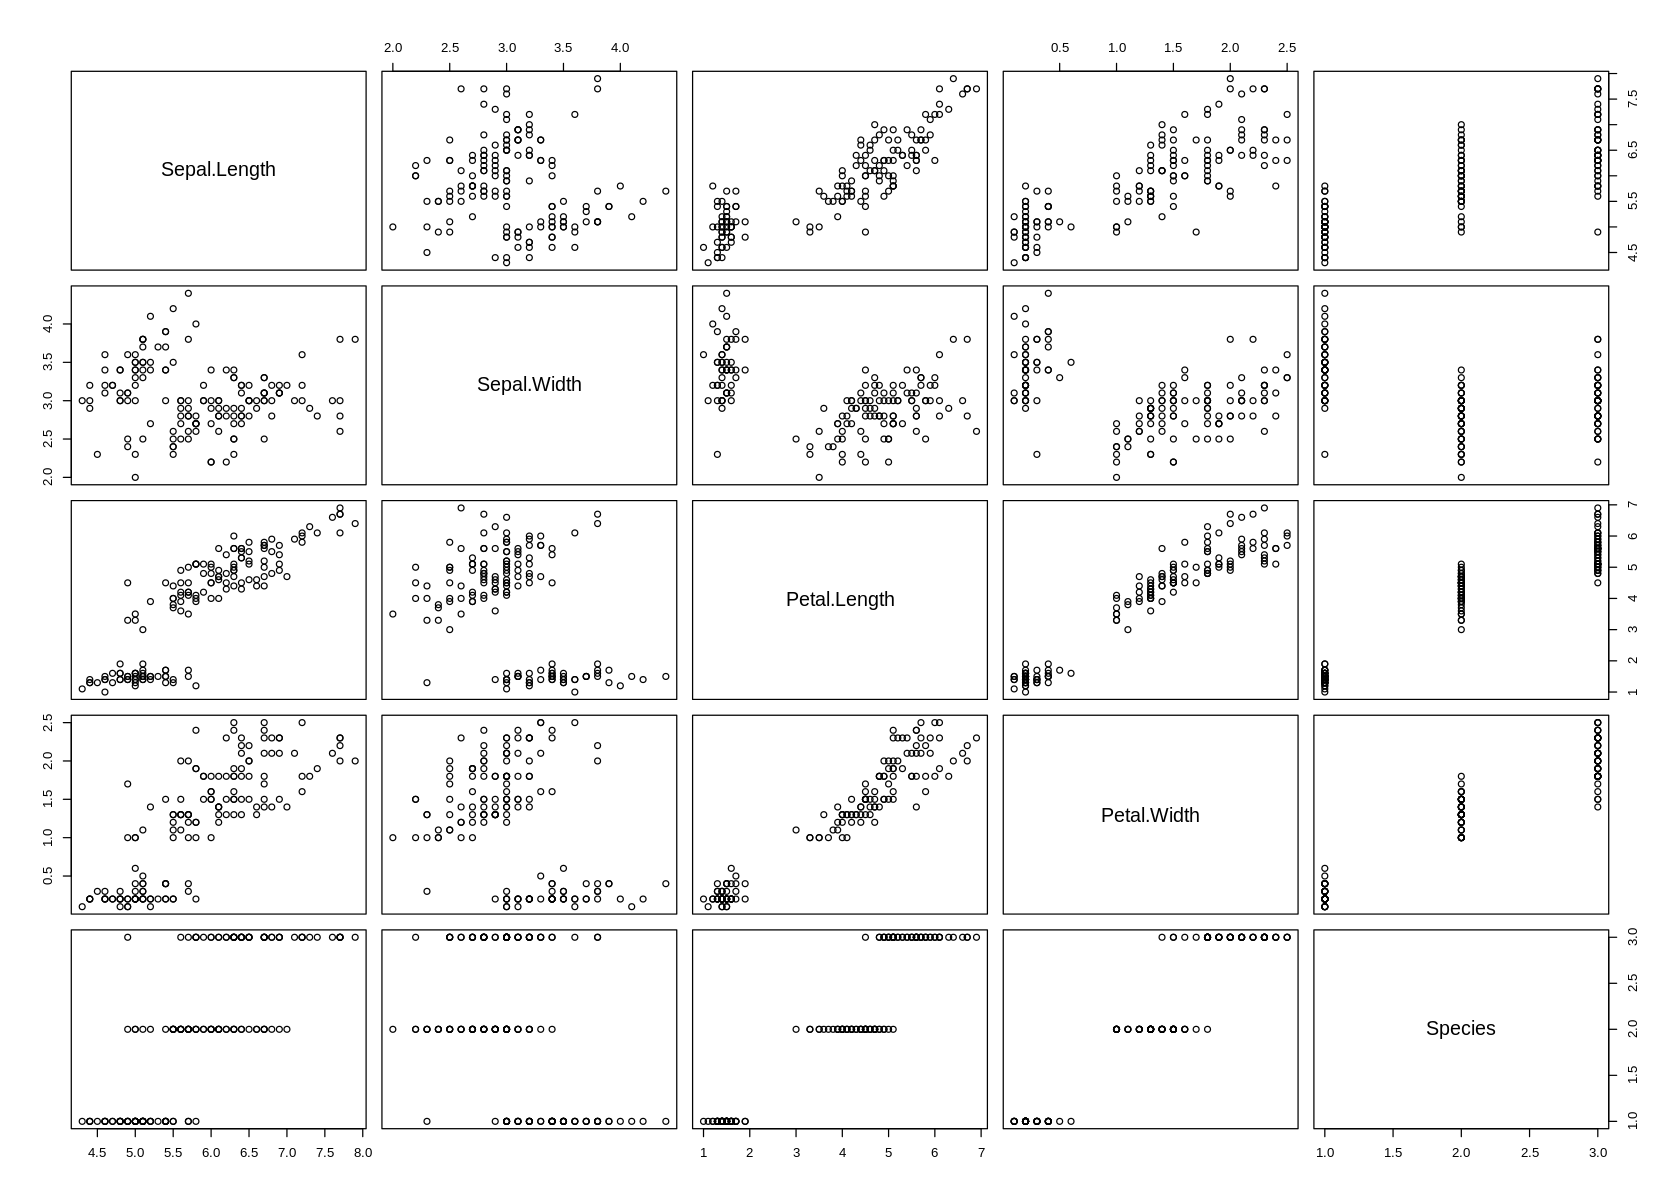

In [ ]:
# From here http://www.parallelr.com/r-deep-neural-network-from-scratch/

# Train: build and train a 2-layers neural network
# ir.model <- train.dnn(x = 1:4, y = 5, traindata=data_train, hidden=6, maxit=2000, display=50)
train.dnn <- function(x, #columns of explanatory variables,
                      y, #column of dependent variable (species)
                      traindata=data,
                      testdata=NULL,
                      # set hidden layers and neurons
                      # currently, only support 1 hidden layer
                      hidden = 6,
                      # max iteration steps:
                      maxit = 2000,
                      # delta loss
                      abstol = 1e-2,
                      # learning rate
                      lr = 1e-2,
                      # regularization rate
                      reg = 1e-3,
                      # show results every 'display' step
                      display = 100,
                      random.seed = 1)
{
  # to make the case reproducible:
  set.seed(0)

  # total number of training set:
  N <- nrow(traindata)

  # extract the data and label
  # don't need atribute
  X <- unname(data.matrix(traindata[ ,x])) # Predictor matrix without header names
  Y <- traindata[ ,y]
  if(is.factor(Y)) { Y <- as.integer(Y) } # Turns species names into numbers 1,2,3

  Y.len   <- length(unique(Y)) # Number of unique species = 3
  Y.set   <- sort(unique(Y))   # In order - the output of this is [1] 1 2 3
  Y.index <- cbind(1:N, match(Y, Y.set)) # Matching example number and "answer" (1, 2, 3)

  # number of input features
  D <- ncol(X)
  # number of categories for classification
  K <- length(unique(Y))
  H <-  hidden # 6 hidden neurons

  # create and init weights and bias

  W1 <- 0.01 * matrix(rnorm(D * H), nrow=D, ncol=H) # 4 x 6 random matrix
  # Will be multiplies by X as in X [90 x 4] W1 [4 x 6]

  b1 <- matrix(0, nrow=1, ncol = H) # Input X data # 1 x 6 matrix. It will act as the bias term



  W2 <- 0.01 * matrix(rnorm(H * K), nrow=H, ncol=K) # 6 x 3 random matrix
  b2 <- matrix(0, nrow=1, ncol=K) # 1 x 3 empty matrix. It will act as the bias term in input layer

  # use all train data to update weights since it's a small dataset
  batchsize <- N

  # init loss:
  loss <- 100000

  # Training the network
  i <- 0
  while(i < maxit && loss > abstol ) {
    #maxit (max iterations) was entered in the function as 2000; loss is 10^5
    #abstol is 0.01 (it's the delta loss)
    # iteration index
    i <- i + 1

    # forward ....

    hidden.layer <- sweep(X %*% W1 , 2, b1, '+') # X[90 x 4] W1 [4 x 6] to give [90 x 6]
    # b1 is [1 x 6]

    # Activation:

    hidden.layer <- pmax(hidden.layer, 0) # Keeps only positive values
    score <- sweep(hidden.layer %*% W2, 2, b2, '+') # [90 x 6] x [6 x 3]
    # and b2 is [1 x 3], acting as the bias

    # softmax
    score.exp <- exp(score) # This is a [90 x 3] matrix
    probs <- sweep(score.exp, 1, rowSums(score.exp), '/')
    # Calculated probability mass function for every example

    # compute the loss
    corect.logprobs <- -log(probs[Y.index]) #cross entropy
    data.loss  <- sum(corect.logprobs)/batchsize
    reg.loss   <- 0.5 * reg * (sum(W1*W1) + sum(W2*W2))
    loss <- data.loss + reg.loss

    # display results and update model
    if( i %% display == 0) {
      if(!is.null(testdata)) {
        model <- list( D = D,
                       H = H,
                       K = K,
                       # weights and bias
                       W1 = W1,
                       b1 = b1,
                       W2 = W2,
                       b2 = b2)
        labs <- predict.dnn(model, testdata[,-y])
        accuracy <- mean(as.integer(testdata[,y]) == Y.set[labs])
        cat(i, loss, accuracy, "\n") #Concatenate and print
      } else {
        cat(i, loss, "\n")
      }
    }

    # backward ....
    dscores <- probs #[90 x 3] matrix of PMF'S (ONE PER EXAMPLE)
    #dscores[Y.index] will pick up the probability associated with the
    #column that contains the true value (species).
    #Now the probability values in the PMF, corresponding to the true columns
    #are subtracted "1", which is the derivative of the activation function (?):
    dscores[Y.index] <- dscores[Y.index] - 1
    dscores <- dscores / batchsize


    dW2 <- t(hidden.layer) %*% dscores
    db2 <- colSums(dscores)

    dhidden <- dscores %*% t(W2)
    dhidden[hidden.layer <= 0] <- 0

    dW1 <- t(X) %*% dhidden
    db1 <- colSums(dhidden)

    # update ....
    dW2 <- dW2  + reg * W2 # reg is regularization rate
    dW1 <- dW1  + reg * W1

    W1 <- W1 - lr * dW1 # lr is the learning rate.
    b1 <- b1 - lr * db1

    W2 <- W2 - lr * dW2
    b2 <- b2 - lr * db2

  }

  # final results
  # creat list to store learned parameters
  # you can add more parameters for debug and visualization
  # such as residuals, fitted.values ...
  model <- list( D = D,
                 H = H,
                 K = K,
                 # weights and bias
                 W1= W1,
                 b1= b1,
                 W2= W2,
                 b2= b2)

  return(model)
}

########################################################################
#PREDICT:

# Prediction
predict.dnn <- function(model, data = X.test) {
  # new data, transfer to matrix
  new.data <- data.matrix(data)

  # Feed Forwad
  hidden.layer <- sweep(new.data %*% model$W1 ,2, model$b1, '+')
  # neurons : Rectified Linear
  hidden.layer <- pmax(hidden.layer, 0)
  score <- sweep(hidden.layer %*% model$W2, 2, model$b2, '+')

  # Loss Function: softmax
  score.exp <- exp(score)
  probs <-sweep(score.exp, 1, rowSums(score.exp), '/')

  # select max possiblity
  labels.predicted <- max.col(probs)
  return(labels.predicted)
}

########################################################################
# testing
#######################################################################
set.seed(1)

# 0. EDA
summary(iris)
head(iris)
plot(iris)

# 1. split data into test/train
# The dataset is practically  packed by species, and the random sampling of rows won't work without shuffling first:
data <- iris[order(runif(nrow(iris))), ]
rownames(data) <- NULL

# We select 60% of the rows towards the "training set":
training_rows <- sample(1:nrow(data), round(0.60 * nrow(data)))
data_train <- data[training_rows, ]
nrow(data_train)

# And 40% for the "testing set":
data_test <- data[-training_rows, ]
nrow(data_test)

# 2. train model
ir.model <- train.dnn(x=1:4, y=5, traindata=data_train, hidden=6, maxit=2000, display=50)

# 3. prediction
labels.dnn <- predict.dnn(ir.model, data_test[-5])

# 4. verify the results
table(data_test[,5], labels.dnn)


#accuracy
mean(as.integer(data_test[, 5]) == labels.dnn)
# 0.95